# LLM Bench Chart Development
This notebook lets us experiment with chart colors and layout for the LLM benchmark results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [6]:
results = Path('llama-2-7b.Q4_0/results.jsonl')
df = pd.read_json(results, orient='records', lines=True)
df.head()

,start_time,end_time,duration_s,mode,value,tokens_per_sec,bench_raw,system_ram_peak_mib,system_ram_delta_mib,system_ram_start_mib,...,gtt_delta_mib,gtt_start_mib,max_temp_c,max_power_w,avg_power_w,median_power_w,build,fa,b,hipblaslt
0,1752329650169,1752329650910,0.741484,pp,1,48.735584,"{'build_commit': 'a4575513', 'build_number': 5...",14478,3957,10521,...,3718,14,48,27.06,19.0420,18.050,llama.cpp-hip,,,
1,1752329651360,1752329652112,0.752240,pp,2,96.560969,"{'build_commit': 'a4575513', 'build_number': 5...",14439,3939,10500,...,3745,14,49,33.08,24.5575,22.530,llama.cpp-hip,,,
2,1752329652332,1752329653060,0.728433,pp,4,184.076910,"{'build_commit': 'a4575513', 'build_number': 5...",14481,4010,10471,...,3718,14,49,38.09,31.0650,29.055,llama.cpp-hip,,,
3,1752329653285,1752329654059,0.773379,pp,8,297.275532,"{'build_commit': 'a4575513', 'build_number': 5...",14506,4002,10504,...,3718,14,53,45.01,35.7825,33.035,llama.cpp-hip,,,
4,1752329654259,1752329655071,0.811694,pp,16,456.854037,"{'build_commit': 'a4575513', 'build_number': 5...",14541,3969,10572,...,3777,14,58,48.06,39.5575,37.055,llama.cpp-hip,,,


In [7]:
# This needs to be rewritten to look like...
'''
RENDER = {
  # HIP
  "hip": {
      color: "RGBA",
      line_width: "",
      line_style: "",
      marker: "",
  },
  "hip_hipblast": {
  },
  hip_fa": {
  },
  "hip_fa_hipbblaslt": {
  },

  # WMMA

  # Vulkan
  
  vulkan_b256...
}


'''


BACKEND_COLORS = {
    'hip': 'tab:blue',
    'rocwmma': 'tab:orange',
    'vulkan': 'tab:green',
}

def _format_b_flag(b: str) -> str:
    if b.startswith('-b '):
        return 'b=' + b.split()[1]
    return b

def _make_label(build: str, fa: str, b: str, hiplt: str) -> str:
    backend = build.split('-', 1)[-1].upper()
    parts = []
    if hiplt:
        parts.append('hipBLASLt')
    if fa:
        parts.append('fa=1')
    if b:
        parts.append(_format_b_flag(b))
    return f'{backend} {' '.join(parts)}'.strip()

def plot_mode(df, mode):
    subset = df[df['mode'] == mode]
    fig, ax = plt.subplots(figsize=(8,5))
    for (build, fa, b, hiplt), grp in subset.groupby(['build','fa','b','hipblaslt']):
        backend = build.split('-', 1)[-1]
        color = BACKEND_COLORS.get(backend, 'tab:gray')
        label = _make_label(build, fa, b, hiplt)
        ax.plot(grp['value'], grp['tokens_per_sec'], marker='o', label=label, color=color)
    ax.set_title(f'Tokens/s – {mode.upper()} sweep')
    ax.set_xlabel('Tokens')
    ax.set_ylabel('Tokens/s')
    ax.grid(True, alpha=0.3, linestyle=':')
    ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
    plt.show()


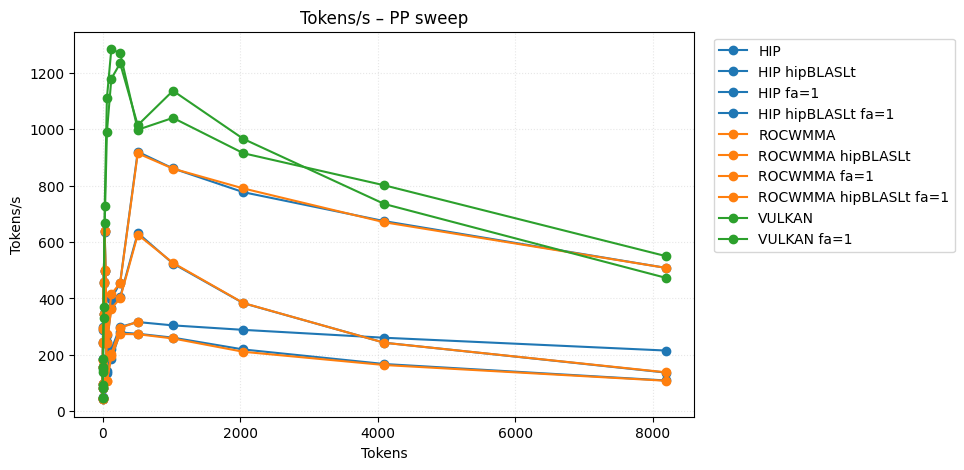

In [8]:
plot_mode(df, 'pp')

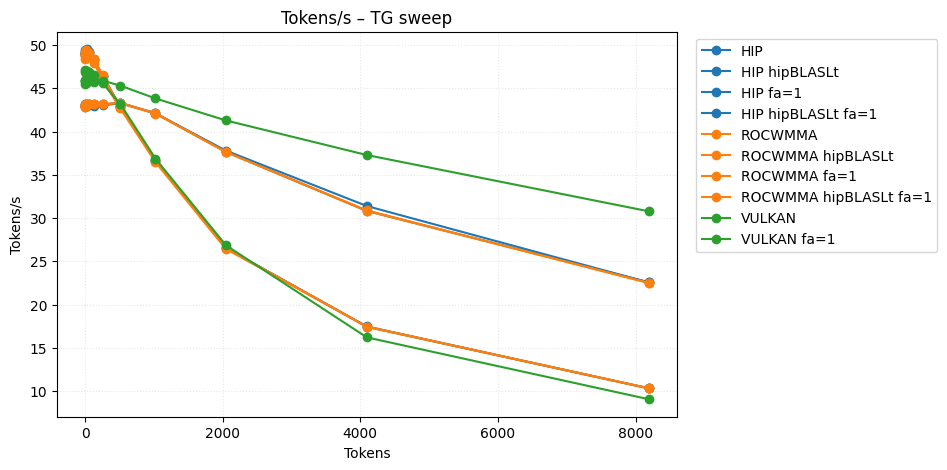

In [9]:
plot_mode(df, 'tg')